<a href="https://colab.research.google.com/github/Mike030668/Class_test/blob/master/%D0%A2%D0%B5%D1%81%D1%82_%D0%B2_%D0%BA%D0%BE%D0%BC%D0%B0%D0%BD%D0%B4%D1%83_%D0%A3%D0%98%D0%98_%D0%BD%D0%B0_predict_%D0%90%D0%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opencv-python

In [15]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont # Модули работы с изображениями
import time

# Загрузка модели с HTML

In [3]:
import gdown
from keras.models import load_model 

file_id = '1ynpVhX-s0IjzKTe5FUCKpz0CfPnuTVwR'
gdown.download('https://drive.google.com/uc?id=' + file_id, 'model5.h5', quiet=False)

train_model = load_model('/content/model5.h5')

# загрузка модели

Downloading...
From: https://drive.google.com/uc?id=1ynpVhX-s0IjzKTe5FUCKpz0CfPnuTVwR
To: /content/model5.h5
80.4MB [00:00, 210MB/s] 


In [4]:
train_model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 128, 128, 3)]     0         
_________________________________________________________________
model_7 (Functional)         [(None, 32, 32, 32), (Non 6603236   
_________________________________________________________________
model_8 (Functional)         (None, 128, 128, 3)       81859     
Total params: 6,685,095
Trainable params: 6,684,455
Non-trainable params: 640
_________________________________________________________________


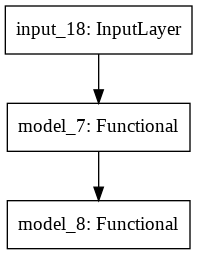

In [5]:
from tensorflow.keras.utils import plot_model #модуль отрисоки структуры нейронки
plot_model(train_model)

# MSE

In [6]:
# создадим функцию среднеквадратичной ошибки
def getMSEmasive(x1, x2): 
  return np.square(np.subtract(x1, x2)) # и возвращаем сумму квадратов разницы, делённую на длину разницы

In [9]:
import cv2 as cv
import os

path = os.path.join(cv2.data.haarcascades, 'haarcascade_frontalface_default.xml')
face_cascade = cv2.CascadeClassifier( path )

# Загрузка видео с HTML

In [7]:
import gdown

file_id = '1ETKBfNoXO8Kafr8Kn1tbzozb94ygRI41'
gdown.download('https://drive.google.com/uc?id=' + file_id, 'test_video.mp4', quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1ETKBfNoXO8Kafr8Kn1tbzozb94ygRI41
To: /content/test_video.mp4
204MB [00:00, 219MB/s]


'test_video.mp4'

In [29]:
path_test_video = '/content/test_video.mp4'
cap = cv2.VideoCapture(path_test_video)

step_frame = 1 #сколько берем кадров
bias = 0.0278

start = time.time()
num_frame = []
np_cutfilm = []
cadr = 0
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
   
    if not ret:
      break

    if cadr % step_frame == 0:
      image_base = frame
      gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
      faces = face_cascade.detectMultiScale(
          gray,
          scaleFactor= 1.1,
          minNeighbors= 5,
          minSize=(10, 10)
      )

      # Рисуем квадраты вокруг лиц
      frame_faces = []
      for i,(x, y, w, h) in enumerate(faces):

          cv2.rectangle(faces, (x, y), (x+w, y+h), (255, 255, 0), 2)

          face_np = image_base[y:y+h,x:x+w,:]

          face_img = Image.fromarray(face_np) 
          face_img = face_img.resize((128, 128)) 
          face_np = np.array(face_img)/255.
          frame_faces.append(face_np)

      frame_faces = np.array(frame_faces)
      if frame_faces.shape[0] != 0:
   
          pred_face = train_model.predict(frame_faces)
          MSEs = getMSEmasive(frame_faces, pred_face)
          errors = [MSEs[i].mean() for i in range(frame_faces.shape[0])] # посчитаем ошибку для всех изображений
          #idx = np.random.choice(range(xTrain.shape[0]), frame_faces.shape[0])
          #MSEs = getMSEmasive(frame_faces, xTrain[idx])
          #errors = [MSEs[i].mean() for i in range(frame_faces.shape[0])] # посчитаем ошибку для всех изображений
          #print("Средняя ошибка на aliens_data:", np.round(np.sum(errors) / len(errors), 4)) # посчитаем для последних 20 среднюю ошибку
          #print("Минимальная ошибка на aliens_data:", np.round(np.min(errors),4)) #найдем минимальную ошибку
          if np.min(errors) < bias:
            print('MSE ', np.round(np.min(errors),4), ' кадр добавлен')
            np_cutfilm.append(image_base)
            num_frame.append(cadr)

    cadr+=1
          
    cv2.waitKey(1) & 0xFF

np_cutfilm = np.array(np_cutfilm)
num_frame = np.array(num_frame)
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()
print('оставлено кадров', np_cutfilm.shape)


fps_of_video = int(cv2.VideoCapture(path_test_video).get(cv2.CAP_PROP_FPS)/step_frame)
if fps_of_video == 0:
   fps_of_video = 1

time_person = np_cutfilm.shape[0]/fps_of_video
time_person = round(time_person/60,1)
print('время Кевина на видео: ',time_person, ' минут')

finish = time.time() - start
print('время обработки', finish)

height, width = np_cutfilm.shape[1:3]

# Определяем кодек и создаем объект VideoWriter
fourcc = cv.VideoWriter_fourcc('m', 'p', '4', 'v')
out = cv.VideoWriter()
output_file_name = '/content/drive/MyDrive/Colab Bases/Команда УИИ/cut15_video_modelAC_mse0_0235.mp4'
out.open(output_file_name, fourcc, fps_of_video, (width, height), True)

for i in range(np_cutfilm.shape[0]):
    out.write((np_cutfilm[i]))


# Высвобождаем ресурсы
cap.release()
out.release()

MSE  0.0184  кадр добавлен
MSE  0.0251  кадр добавлен
MSE  0.0232  кадр добавлен
MSE  0.0165  кадр добавлен
MSE  0.0171  кадр добавлен
MSE  0.0163  кадр добавлен
MSE  0.0167  кадр добавлен
MSE  0.0167  кадр добавлен
MSE  0.0167  кадр добавлен
MSE  0.0165  кадр добавлен
MSE  0.0235  кадр добавлен
MSE  0.0238  кадр добавлен
MSE  0.0239  кадр добавлен
MSE  0.0236  кадр добавлен
MSE  0.0241  кадр добавлен
MSE  0.024  кадр добавлен
MSE  0.0243  кадр добавлен
MSE  0.0236  кадр добавлен
MSE  0.0239  кадр добавлен
MSE  0.0238  кадр добавлен
MSE  0.0241  кадр добавлен
MSE  0.0239  кадр добавлен
MSE  0.0242  кадр добавлен
MSE  0.024  кадр добавлен
MSE  0.0244  кадр добавлен
MSE  0.024  кадр добавлен
MSE  0.0243  кадр добавлен
MSE  0.0237  кадр добавлен
MSE  0.0239  кадр добавлен
MSE  0.0236  кадр добавлен
MSE  0.0242  кадр добавлен
MSE  0.0237  кадр добавлен
MSE  0.0238  кадр добавлен
MSE  0.0241  кадр добавлен
MSE  0.0241  кадр добавлен
MSE  0.0238  кадр добавлен
MSE  0.0241  кадр добавлен
MSE 